In [ ]:
## might need to enter authorization code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



2.   Next, let us install the dependencies you will need to convert this notebook to pdf (point 3 of submission instructions) using `nbconvert` utility for submission to Gradescope. To install `nbconvert`, run the following commands - make sure they complete without any errors - seek help on the Gauchospace forums or from TAs if you encounter errors. 
Watch out for a prompt to press ENTER - you have to respond by clicking below the prompt to reveal a text box and then press enter.
NOTE: in order to reduce the size of this notebook, the output of the following code cell can be deleted (by clicking the 'x' icon that shows up in the top left of the cell output, before saving this notebook as a pdf).

In [ ]:
!git clone https://github.com/jupyter/nbconvert.git
%cd nbconvert
!pip install -e .;
%cd /content/
!apt-get -q install pandoc
!apt-get -qq update
!apt-get -qq install inkscape
!add-apt-repository universe
!add-apt-repository ppa:inkscape.dev/stable
!apt-get -qq update
!apt -qq install inkscape
!apt-get -qq install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Cloning into 'nbconvert'...
remote: Enumerating objects: 19656, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 19656 (delta 52), reused 31 (delta 21), pack-reused 19560
Receiving objects: 100% (19656/19656), 4.13 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (13413/13413), done.
/content/nbconvert
Obtaining file:///content/nbconvert
     |████████████████████████████████| 122kB 17.6MB/s 
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
  Running setup.py develop for nbconvert
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


/content
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Extracting templates from packages: 100%
Preconfiguring packages ...
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../libperl5.26_5.26.1-6ubuntu0.5_amd64.deb ...
Unpacking libperl5.26:amd64 (5.26.1-6ubuntu0.5) over (5.26.1-6ubuntu0.3) ...
Preparing to unpack .../perl_5.26.1-6ubuntu0.5_amd64.deb ...
Unpacking perl (5.26.1-6ubuntu0.5) over (5.26.1-6ubuntu0.3) ...
Preparing to unpack .../perl-base_5.26.1-6ubuntu0.5_amd64.deb ...
Unpacking perl-base (5.26.1-6ubuntu0.5) over (5.26.1-6ubuntu0.3) ...
Setting up perl-base (5.26.1-6ubuntu0.5) ...
(Reading database ... 

3. Restart runtime to load newly-installed libraries (Runtine --> Restart runtime)

# K-Nearest Neighbors (programming problem): 
The purpose of this problem is to introduce you to the concepts of distance metrics (in this case the sum of square
errors), sorting based on these distances – i.e., nearest neighbors to a query, training
and testing data sets. In this particular case, the test data item is not in the ”training
data”, though there is really no ”training” happening. This will become clear to
you once you start working on the problem. However, we would like to keep this
distinction between the training and test data since we will be re-using this data in
future homework as well.



---


For this homework, we will be using K-Nearest Neighbor to classify image from
the CIFAR-10 dataset. Basic idea behind K-Nearest Neighbor algorithm is to use a
distance measure in order to find the K-nearest neighbors of a test sample. The test
sample is then assigned the label based on the labels of these neighbors.
Dataset: We are going to use CIFAR-10 dataset in order to implement K-Nearest
neighbor algorithm. Dataset can be found at https://www.cs.toronto.edu/~kriz/
cifar.html Training and testing splits are also mentioned on the webpage. You may
use only data batch 1 for your training set, and the first 1000 samples of test batch
for the test set.



---


Distance Measure: An example distance between 2 images can be the sum of squared
difference between pixel intensities.
Note: If you try to find difference between two 32x32 RGB (Red, Green, Blue) images, you will need to compute 32x32 differences for each of the three, R G B channels.



---


Label assignment strategy: Once the K-Nearest Neighbors to a test sample are
found, assign it the to the label which majority of its neighbors have. In cases of
a tie, Consider the distance information in order to break the tie.



---


In [ ]:
#Data Citing: 
#Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

import numpy as np
import matplotlib.pyplot as plt
import pickle

def unpickle(file):
  with open("/content/drive/MyDrive/ECE180/" + file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
  return dict

train_batch_1 = unpickle("cifar-10-batches-py/data_batch_1")

train_data = np.array(train_batch_1[b'data'], dtype='int64') / 255.



train_labels = np.array(train_batch_1[b'labels'], dtype='int64')

test_batch = unpickle("cifar-10-batches-py/test_batch")

test_data = np.array(test_batch[b'data'], dtype='int64') / 255.

print(test_data.shape)
test_labels = np.array(test_batch[b'labels'], dtype='int64')


test_data = test_data[0:1000]
test_labels = test_labels[0:1000]

print(test_data.shape)

(10000, 3072)
(1000, 3072)


In [ ]:
class KNN(object):
    # K Nearest neighbor classifier
    def __init__(self):
        pass

    def train(self, train_data, train_labels):
        # Learn the training instances
        self.train_data = train_data
        self.train_labels = train_labels

    #computing in parallel
    def compute_distances(self, test_data):
        num_test = test_data.shape[0]
        num_train = self.train_data.shape[0]
        distances = np.zeros((num_test, num_train))
        distances = np.sqrt(np.sum(np.square(self.train_data), axis=1) + np.sum(np.square(test_data), axis=1)[:, np.newaxis] - 2 * np.dot(test_data, self.train_data.T))
        pass
        return distances

    def predict(self, distances, k=1, show_closest = False):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(distances[i])
            closest_y = np.asarray(list(self.train_labels[sorted_dist[0:k]]))
            pass
            y_pred[i]= (np.argmax(np.bincount(closest_y)))
            pass
            #print(closest_y)
        #print(y_pred)
        if(show_closest):
          return y_pred, closest_y
        else:
          return y_pred
          

#ref: 
#https://cs231n.github.io/classification/
#https://github.com/shreyagu/kNN_CiFAR10dataset/blob/master/knn_CIFAR10.ipynb

# Part a) 
Apply K-Nearest Neighbor algorithm with k = 1 on the test samples. We define the classification error rate as

Pe = Number of Wrongly Classified Test Samples/Total Number of Test Samples.

Q: **What is the error rate of your classification?**

A: The error rate = 0.717

In [ ]:
knn = KNN()
knn.train(train_data, train_labels)
distances = knn.compute_distances(test_data)
predictions = knn.predict(distances)



In [ ]:
def prediction_error(predictions):
  idx = 0
  wrong_count = 0
  max_samples = test_data.shape[0]
  for prediction in predictions:
    if(prediction != test_labels[idx]):
        wrong_count += 1

    if idx == max_samples:
        break

    idx += 1

  pred_error = wrong_count/max_samples
  return pred_error

In [ ]:
PE = prediction_error(predictions)
print("Prediction Error:" + str(PE))

Prediction Error:0.717


# Part b) 

Repeat last step for k = 2, 5, 10, 20 and plot the error rate Pe against k.

Q: **Does the error rate decrease with k?**

A: The error rate begins to decrease after k = 2 because in observation of the plotted Prediction Error values, there is a spike at K=2 then a decrease in Prediction Error value afterwards.

Q: **Should the error rate always decrease with k?**

A: The error rate will decrease with K up to a certain value of K where the error rate will increase once again. The reason for this increase comes from adding more nearest data points from outside a cluster of a certain class. If more data points outside the cluster of relatively close points are taken into consideration then the error rate is likely to increase. 

In [ ]:

results = []
K_vals = [2, 5, 10, 20]
results.append(PE)
#Append error rate from Part a)
#results.append(PE)

for k in K_vals:
  distances = knn.compute_distances(test_data)
  predictions = knn.predict(distances, k)
  pred_error = prediction_error(predictions)
  results.append(pred_error)
  

In [ ]:
results

[0.717, 0.748, 0.704, 0.712, 0.703]

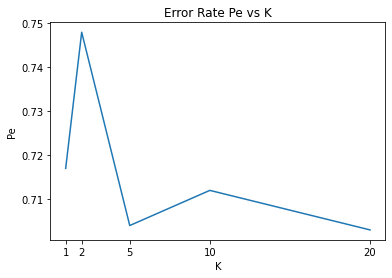

In [ ]:

plt.plot([1, 2, 5, 10, 20], results, label='Error Rate Pe')
plt.title("Error Rate Pe vs K")
plt.ylabel('Pe')
plt.xlabel('K')
plt.xticks([1, 2, 5, 10, 20])
plt.show()

# Part c) 
For each of the ten classes, pick a random image from test data and report its 10 nearest neighbors. 


In [ ]:
#Find the first test sample for each class and append to class_samples list
class_samples = []
for class_label in range(10):
  for i in range(len(test_labels)):
    if(test_labels[i] == class_label):
      class_samples.append(test_data[i])
      break
class_samples = np.expand_dims(class_samples, axis = 1)

#Run kNN for each class's test sample
for i in range(len(class_samples)):
  distances = knn.compute_distances(class_samples[i])
  label, nearest_neighbors = knn.predict(distances, 10, True)

  print("10 nearest neighbors Labels for Class #" + str(i) + ": ")
  print(nearest_neighbors)
  

10 nearest neighbors Labels for Class #0: 
[8 2 0 8 8 8 2 8 0 4]
10 nearest neighbors Labels for Class #1: 
[3 4 8 6 5 6 6 2 4 4]
10 nearest neighbors Labels for Class #2: 
[6 6 4 4 0 4 4 4 6 8]
10 nearest neighbors Labels for Class #3: 
[6 4 4 4 2 4 6 6 4 7]
10 nearest neighbors Labels for Class #4: 
[0 0 0 2 0 0 0 6 3 0]
10 nearest neighbors Labels for Class #5: 
[5 5 4 6 3 4 6 6 5 3]
10 nearest neighbors Labels for Class #6: 
[4 5 5 4 4 4 2 4 4 2]
10 nearest neighbors Labels for Class #7: 
[7 4 6 6 6 1 6 5 6 6]
10 nearest neighbors Labels for Class #8: 
[8 9 8 8 8 8 2 0 8 1]
10 nearest neighbors Labels for Class #9: 
[0 8 8 7 4 9 1 8 8 8]


# Saving to Notebook

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/ECE180/ECE180-S21-HW4.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ECE180/ECE180-S21-HW4.ipynb to PDF
/content/nbconvert/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Support files will be in ECE180-S21-HW4_files/
[NbConvertApp] Making directory ./ECE180-S21-HW4_files
[NbConvertApp] Writing 90586 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 89896 bytes to /content/drive/MyDrive/ECE180/ECE180-S21-HW4.pdf
